In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/Datasets/Skin Cancer with Categories/Skin cancer ISIC/Train"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 9

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

train_ds = train_ds.map(normalize_img)
val_ds = val_ds.map(normalize_img)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 359s 6s/step - accuracy: 0.2208 - loss: 2.4251 - val_accuracy: 0.3490 - val_loss: 1.8911
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.3248 - loss: 1.8601 - val_accuracy: 0.3065 - val_loss: 1.9107
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 0.3807 - loss: 1.7292 - val_accuracy: 0.5302 - val_loss: 1.4814
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 325ms/step - accuracy: 0.4619 - loss: 1.4968 - val_accuracy: 0.4541 - val_loss: 1.5566
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - accuracy: 0.4834 - loss: 1.4802 - val_accuracy: 0.5078 - val_loss: 1.4189
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 338ms/step - accuracy: 0.4811 - loss: 1.4260 - val_accuracy: 0.4720 - val_loss: 1.5564
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - accuracy: 0.5199 - loss: 1.3531 - val_accuracy: 0.5414 - val_loss: 1.3611
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 307ms/step - accuracy: 0.5447 - loss: 1.2697 - val_accura

In [ ]:
model.save("/content/drive/MyDrive/skin-cancer/saved_models/clases_lesiones.h5")

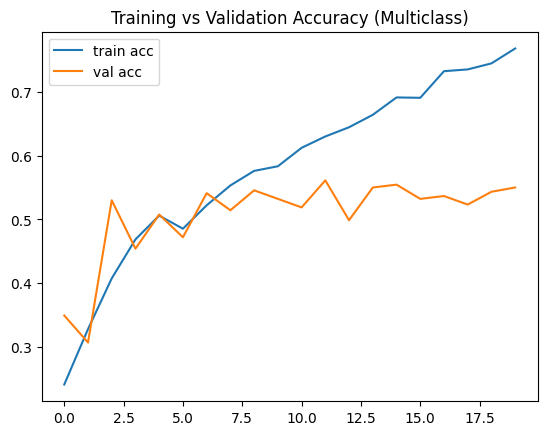

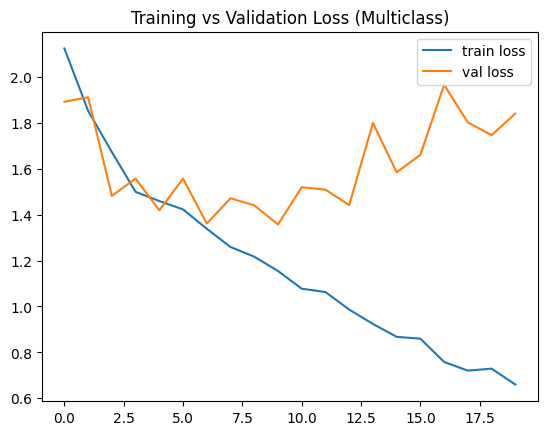

In [ ]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend(); plt.title("Training vs Validation Accuracy (Multiclass)"); plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend(); plt.title("Training vs Validation Loss (Multiclass)"); plt.show()